## Libraries

In [185]:
import pandas as pd
import numpy as np
import random

In [68]:
# Viz mantra
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [171]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## importing data

In [179]:
df = pd.read_csv("../data/measurements.csv")
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


Info about the dataframe:

started writing down the data in November, changed to SP98 in winter, and back to E10 in spring

displayed distance (km); the consume (L/100km); the average speed (km/h), the temperature inside (°C), the temperature outside (°C), gas type used, anything special that happened, if it was raining, if the air condition was on, if it was sunny enough that the car felt warm when started…. There are also two columns saying how much and which gas type was buoght. 

AC, rain and sun can assume values 0-1 ( 0=no/False, 1=yes/True)

gas types:
E10 =  improved version of the SP95
E10  seems to be more environmentally friendly because it contains up to 10 ethanol, a vegetable alcohol made from beetroot or wheat (E10 – Ethanol 10). For the record, SP95/98 also contains ethanol but only up to 5. As mentioned above, only vehicles put into circulation after 2000 can drive at the E10
95 and 98, representing the octane index. This index assesses self-ignition resistance in a gasoline engine. The higher the index, the greater its strength, its combustion is controlled, thus protecting the performance and longevity of the engine, especially the valves and the injector

## exploring data

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [38]:
# change type of columns 'consume' and 'distance' from string to float
df["consume"] = df["consume"].apply(lambda x: float(x.replace(',','.')))
df["distance"] = df["distance"].apply(lambda x: float(x.replace(',','.')))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    object 
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 36.5+ KB


In [10]:
df["gas_type"].value_counts()

gas_type
SP98    228
E10     160
Name: count, dtype: int64

In [17]:
df[df["specials"].notna()]["specials"].value_counts()

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

In [20]:
df[(df["specials"]=='rain') & (df["rain"]==0)]
# no new important information in 'specials'

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas


In [21]:
df[(df["specials"]=='sun') & (df["sun"]==0)]
# no new important information in 'specials'

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas


In [22]:
df[df["specials"]=="AC rain"]
# no new important information in 'specials'

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
40,"12,4",4,55,"21,5",7,AC rain,E10,1,1,0,NaN,NaN
60,"2,9","7,9",18,"21,5",9,AC rain,SP98,1,1,0,NaN,NaN
94,"11,8","5,9",21,20,9,AC rain,SP98,1,1,0,NaN,NaN
101,"26,2","5,8",71,21,8,AC rain,SP98,1,1,0,NaN,NaN
104,"12,4","5,4",18,21,11,AC rain,SP98,1,1,0,NaN,NaN
153,"17,3",5,61,"21,5",6,AC rain,E10,1,1,0,NaN,NaN
204,"8,7","5,3",28,"22,5",12,AC rain,SP98,1,1,0,NaN,NaN
228,13,"5,7",38,"22,5",3,AC rain,SP98,1,1,0,NaN,NaN
277,16,"4,4",40,22,7,AC rain,SP98,1,1,0,NaN,NaN


In [32]:
df[df["specials"]=="ac rain"]
# no new important information in 'specials'

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
344,"16,1","5,1",30,25,16,ac rain,E10,1,1,0,NaN,NaN


In [23]:
df[df["specials"]=="AC"]
# no new important information in 'specials'

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
41,"4,5",5,29,"21,5",7,AC,E10,1,0,0,NaN,NaN
69,"11,8","4,5",37,"21,5",4,AC,SP98,1,0,0,NaN,NaN
205,"7,9","4,7",31,"22,5",12,AC,SP98,1,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [27]:
df[df["specials"]=="sun ac"]
# no new important information in 'specials'

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
299,"18,7","4,2",65,25,18,sun ac,SP98,1,0,1,NaN,NaN
301,19,5,35,22,15,sun ac,SP98,1,0,1,NaN,NaN
366,"16,6","4,1",48,"25,5",30,sun ac,SP98,1,0,1,NaN,NaN


In [30]:
df[df["specials"]=="AC sun"]
# no new important information in 'specials'

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
273,"93,9","4,8",88,23,18,AC sun,E10,1,0,1,NaN,NaN


In [31]:
df[df["specials"]=="AC Sun"]
# no new important information in 'specials'

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
331,"21,5","4,8",47,25,27,AC Sun,E10,1,0,1,NaN,NaN


In [26]:
df[df["specials"]=="snow"]
# no new important information in 'specials'

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
118,"12,4","4,6",38,23,1,snow,SP98,0,1,0,NaN,NaN
124,"11,8","4,6",38,23,0,snow,SP98,0,1,0,NaN,NaN
125,"12,2","6,3",57,23,0,snow,SP98,0,1,0,NaN,NaN


In [28]:
df[df["specials"]=="AC snow"]
# no new important information in 'specials'

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
181,"12,3","7,1",52,"22,5",0,AC snow,E10,1,1,0,NaN,NaN


In [29]:
df[df["specials"]=="half rain half sun"]
# no new important information in 'specials'

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
191,"43,7","4,7",44,22,9,half rain half sun,SP98,0,1,0,10,SP98


In [25]:
df[(df["specials"]=="ac") & (df["AC"]==0)]
# it's not clear if AC was being used or not

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
334,"129,7","4,6",58,24,21,ac,E10,0,0,0,NaN,NaN


In [47]:
df[df["refill gas"].notna()]
# no useful information

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,"21,5",12,NaN,E10,0,0,0,45,E10
44,5.4,3.3,32,"21,5",7,NaN,SP98,0,0,0,"37,6",SP98
82,10.5,3.6,42,20,10,NaN,SP98,0,0,0,"37,7",SP98
106,162.7,5.5,75,23,1,NaN,SP98,0,0,0,45,SP98
139,16.1,5.4,24,"21,5",7,rain,E10,0,1,0,38,E10
171,44.4,4.8,38,"21,5",8,NaN,E10,0,0,0,"38,3",E10
191,43.7,4.7,44,22,9,half rain half sun,SP98,0,1,0,10,SP98
192,12.1,4.2,43,22,4,NaN,SP98,0,0,0,39,SP98
234,19.0,4.5,29,"22,5",10,NaN,E10,0,0,0,39,E10
274,25.7,4.9,50,22,10,rain,SP98,0,1,0,41,SP98


In [48]:
df[df["refill liters"].notna()]
# no useful information

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,"21,5",12,NaN,E10,0,0,0,45,E10
44,5.4,3.3,32,"21,5",7,NaN,SP98,0,0,0,"37,6",SP98
82,10.5,3.6,42,20,10,NaN,SP98,0,0,0,"37,7",SP98
106,162.7,5.5,75,23,1,NaN,SP98,0,0,0,45,SP98
139,16.1,5.4,24,"21,5",7,rain,E10,0,1,0,38,E10
171,44.4,4.8,38,"21,5",8,NaN,E10,0,0,0,"38,3",E10
191,43.7,4.7,44,22,9,half rain half sun,SP98,0,1,0,10,SP98
192,12.1,4.2,43,22,4,NaN,SP98,0,0,0,39,SP98
234,19.0,4.5,29,"22,5",10,NaN,E10,0,0,0,39,E10
274,25.7,4.9,50,22,10,rain,SP98,0,1,0,41,SP98


## cleaning

In [188]:
def gastype(gas):
    '''gas type in, integer out'''
    if gas == "E10":
        return 0
    else:
        return 1


In [191]:
def clean_df (df):
    new_df = df.copy(deep=False)
    
    # changing type of columns 'consume' and 'distance' from string to float
    new_df["distance"] = new_df["distance"].apply(lambda x: float(x.replace(',','.')))
    new_df["consume"] = new_df["consume"].apply(lambda x: float(x.replace(',','.')))
    
    # deleting rows with contraddicting informations on columns 'specials' and 'AC'
    new_df.drop(df[(df["specials"]=="ac") & (df["AC"]==0)].index, inplace=True)
    new_df.reset_index(drop= True, inplace=True)
    
    # removing not useful columns
    new_df.drop(columns=["temp_inside", "specials", "refill liters", "refill gas"], inplace=True)
    
    # adding a column with consume/distance ratio
    new_df["consume/distance"] = new_df["consume"] / new_df["distance"]
    
    # translate the gas type to binary 
    new_df['gas_type_bin']= new_df['gas_type'].apply(gastype)

    return new_df

In [192]:
new_df = clean_df(df)

In [193]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          387 non-null    float64
 1   consume           387 non-null    float64
 2   speed             387 non-null    int64  
 3   temp_outside      387 non-null    int64  
 4   gas_type          387 non-null    object 
 5   AC                387 non-null    int64  
 6   rain              387 non-null    int64  
 7   sun               387 non-null    int64  
 8   consume/distance  387 non-null    float64
 9   gas_type_bin      387 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 30.4+ KB


In [194]:
new_df.to_csv("../data/cleaned_measuraments.csv", index=False)

## removing outliers

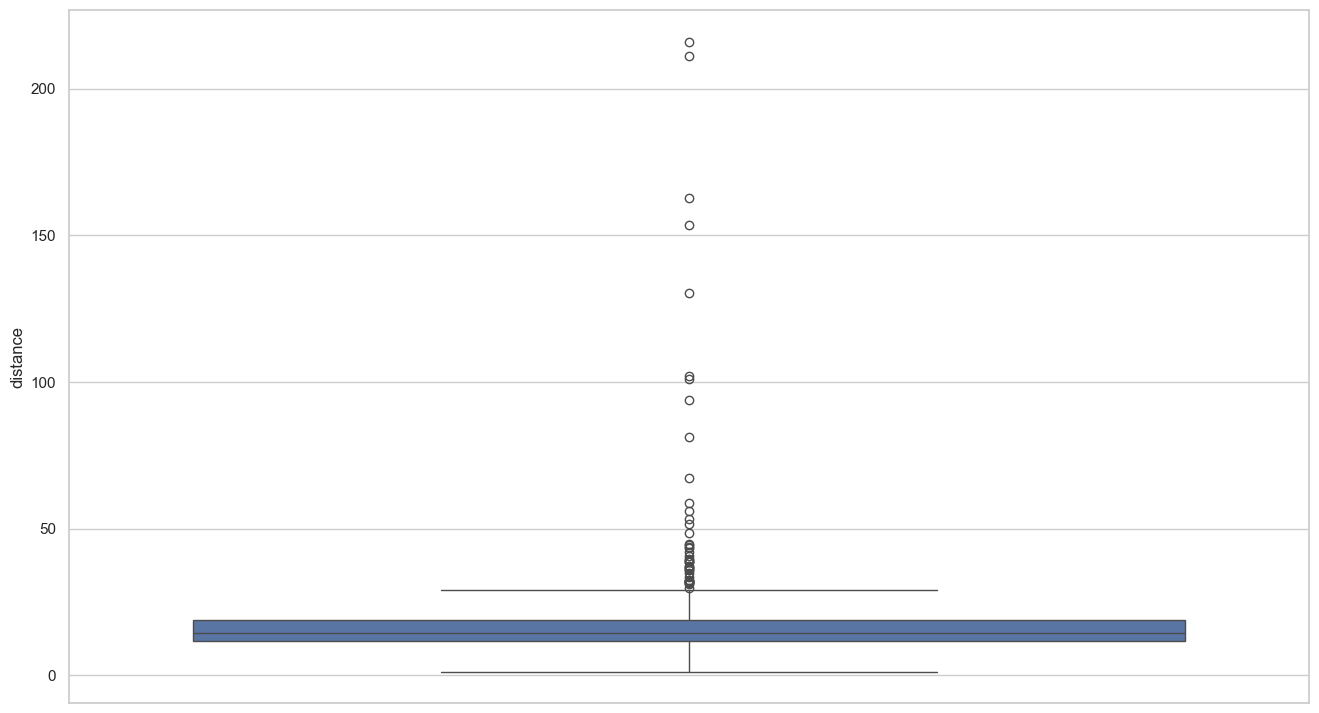

In [157]:
sns.boxplot(new_df["distance"]);

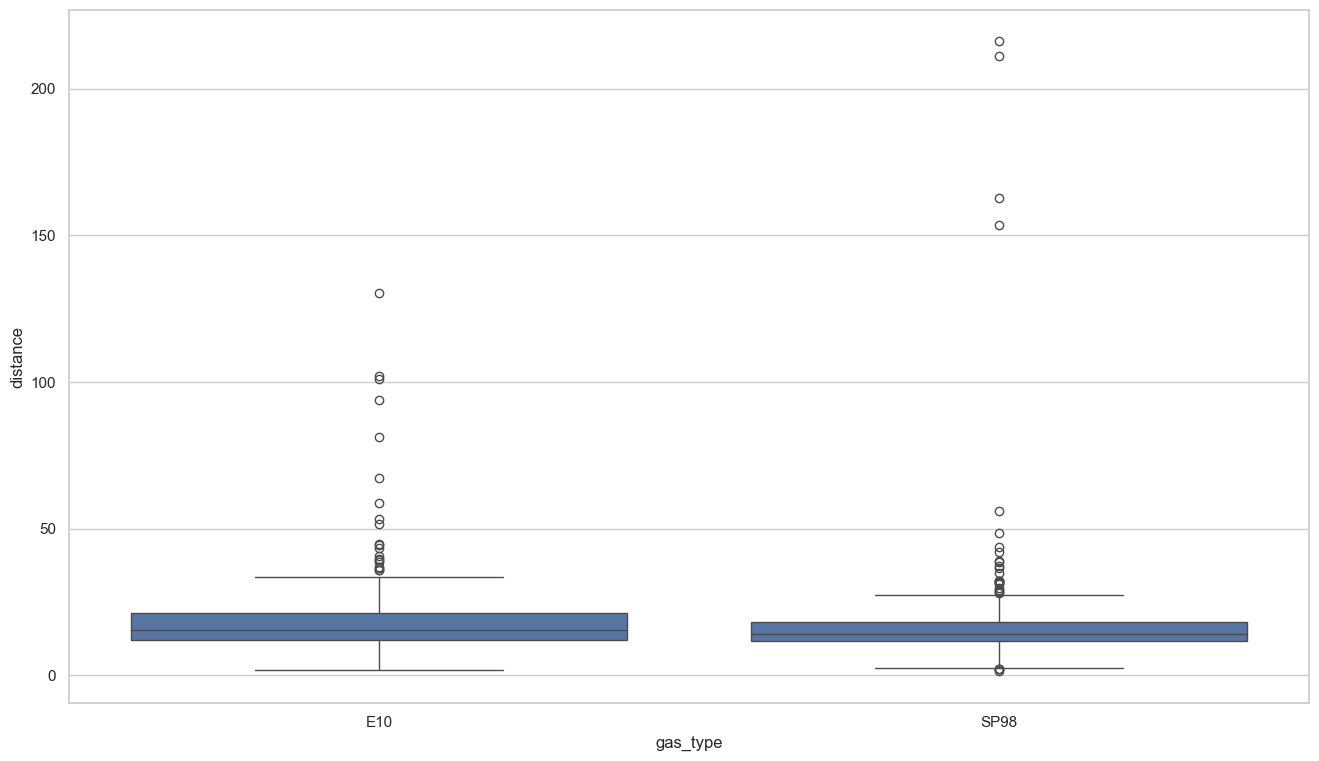

In [158]:
sns.boxplot(x = new_df["gas_type"] ,y = new_df["distance"]);

In [159]:
def remove_distance_outliers(df):
    Q1 = df["distance"].quantile(0.25)
    Q3 = df["distance"].quantile(0.75)
    left = Q1 - 1.5 * (Q3-Q1)
    right = Q3 + 1.5 * (Q3-Q1)
    return df.drop(df[(df["distance"]<left) | (df["distance"]>right)].index).reset_index(drop=True)

In [160]:
df_no_distance_outliers = remove_distance_outliers(new_df)

In [162]:
df_no_distance_outliers = remove_distance_outliers(df_no_distance_outliers)

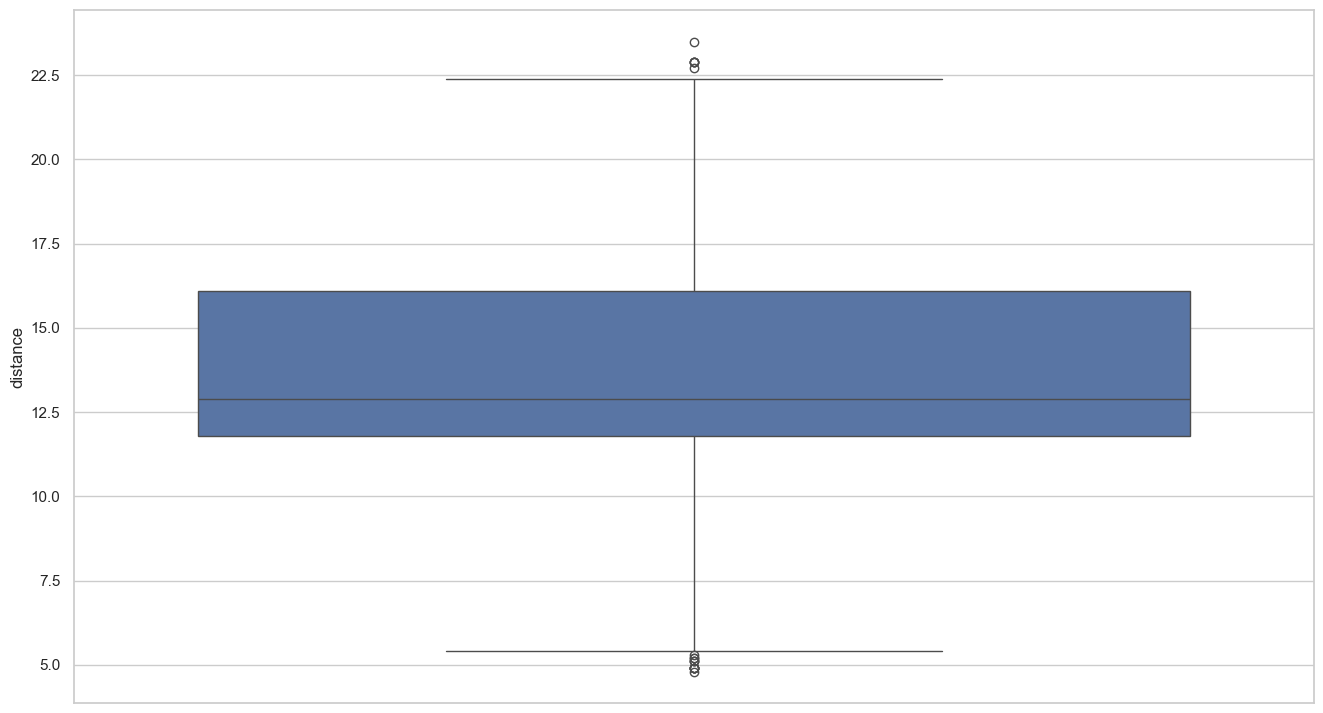

In [163]:
sns.boxplot(df_no_distance_outliers["distance"]);

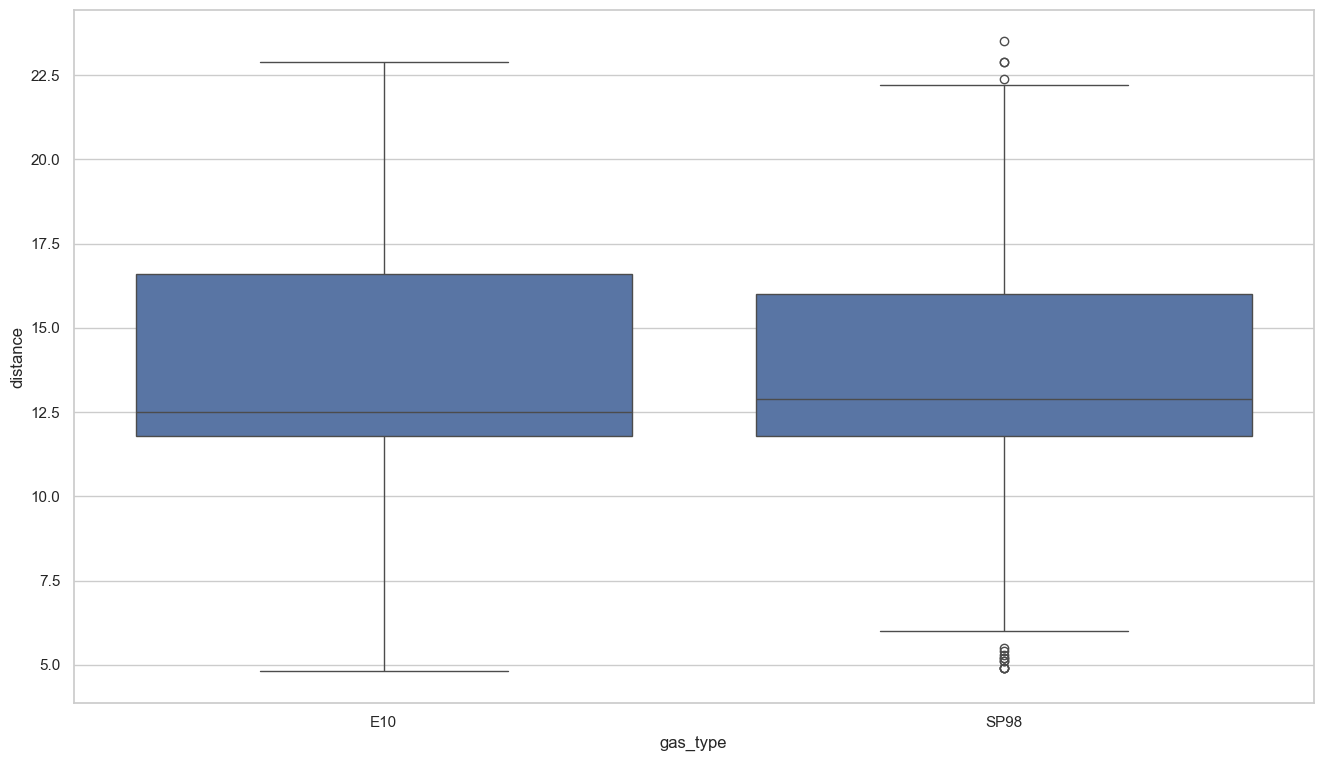

In [164]:
sns.boxplot(x = df_no_distance_outliers["gas_type"] ,y = df_no_distance_outliers["distance"]);

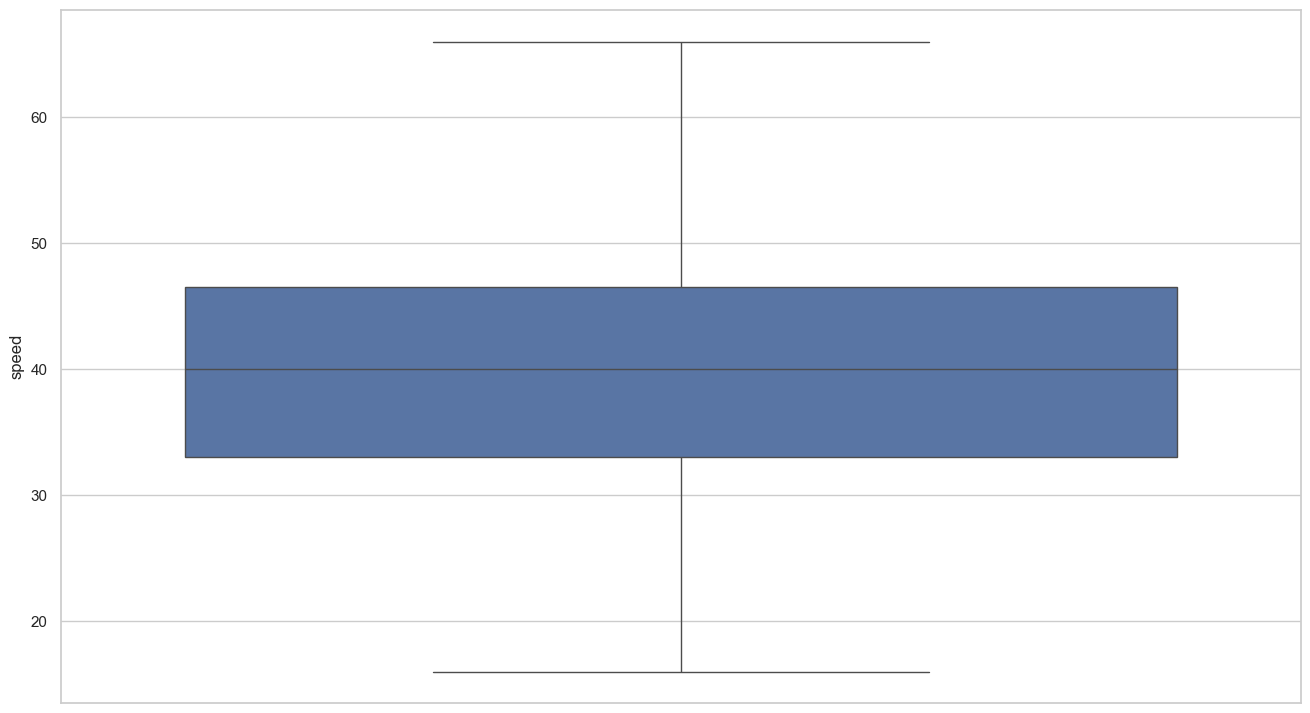

In [165]:
sns.boxplot(df_no_distance_outliers["speed"]);

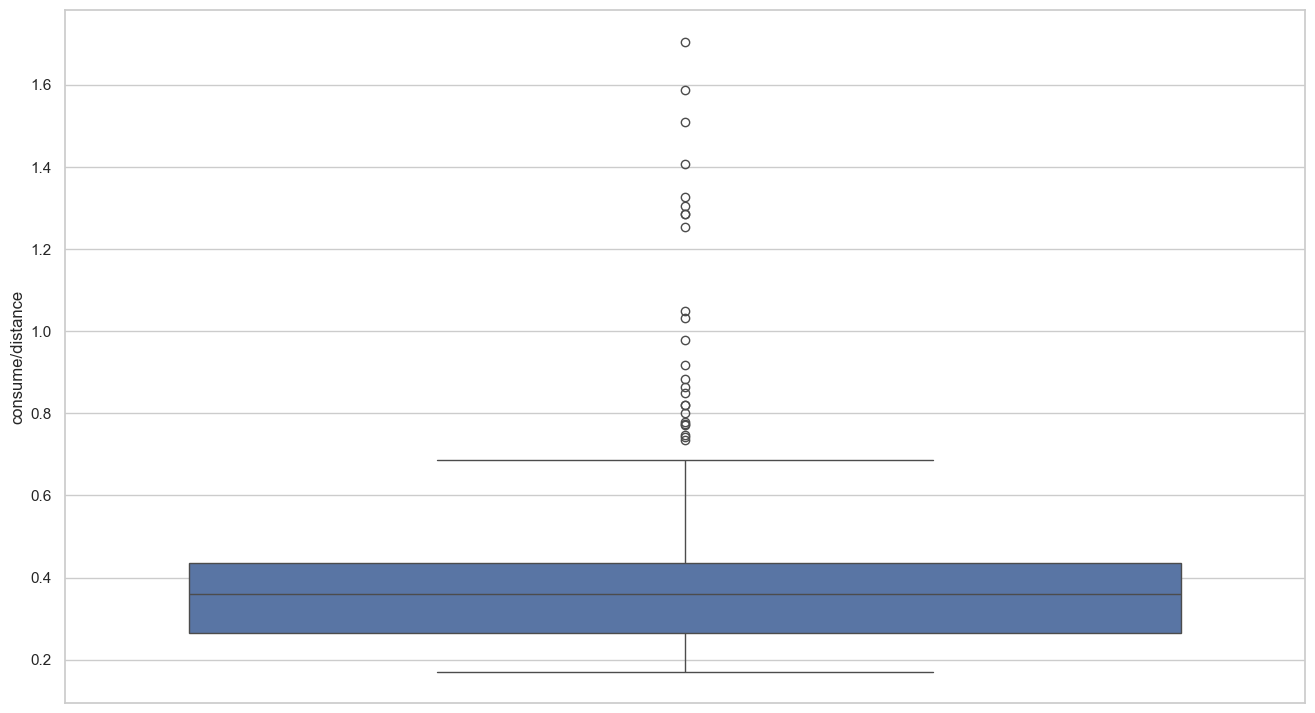

In [167]:
sns.boxplot(df_no_distance_outliers["consume/distance"]);

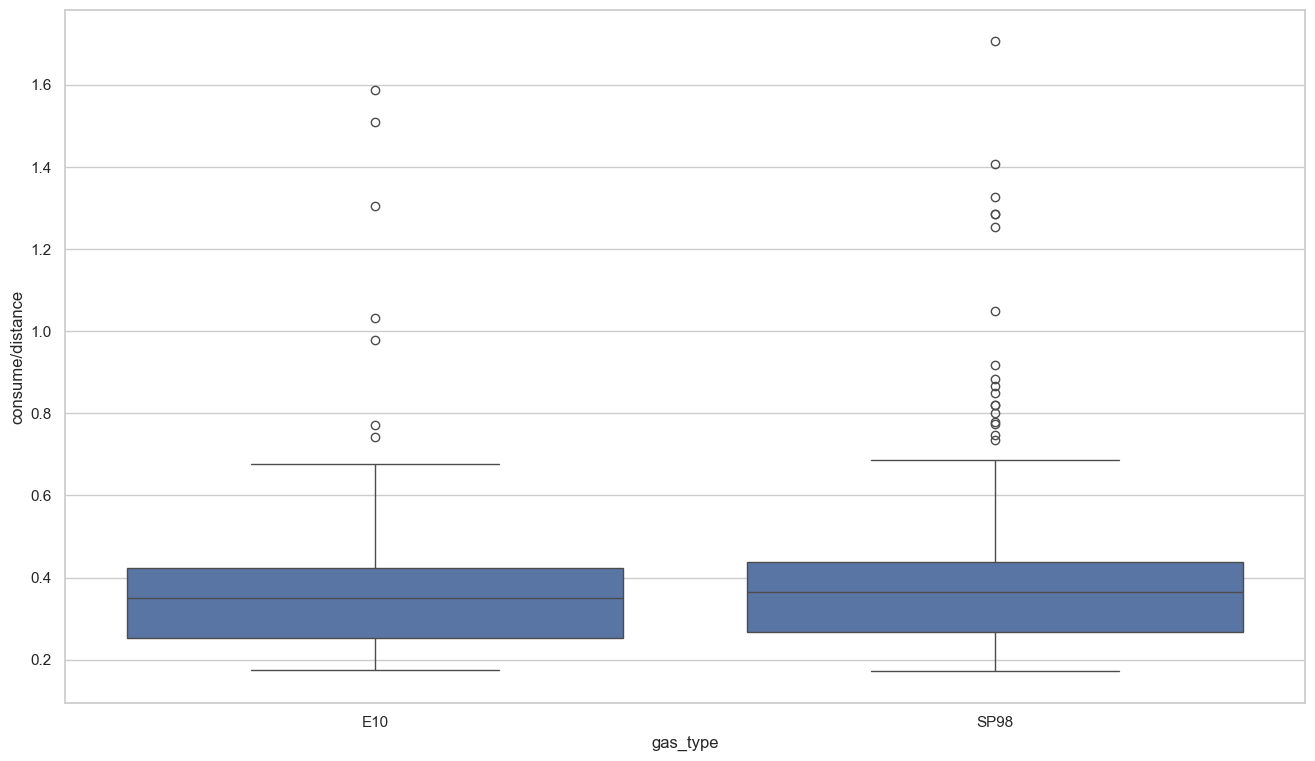

In [166]:
sns.boxplot(x = df_no_distance_outliers["gas_type"], y=df_no_distance_outliers["consume/distance"]);

In [168]:
def remove_cons_dist_outliers(df):
    Q1 = df["consume/distance"].quantile(0.25)
    Q3 = df["consume/distance"].quantile(0.75)
    left = Q1 - 1.5 * (Q3-Q1)
    right = Q3 + 1.5 * (Q3-Q1)
    return df.drop(df[(df["consume/distance"]<left) | (df["consume/distance"]>right)].index).reset_index(drop=True)

In [169]:
df_no_outliers = remove_cons_dist_outliers(df_no_distance_outliers)

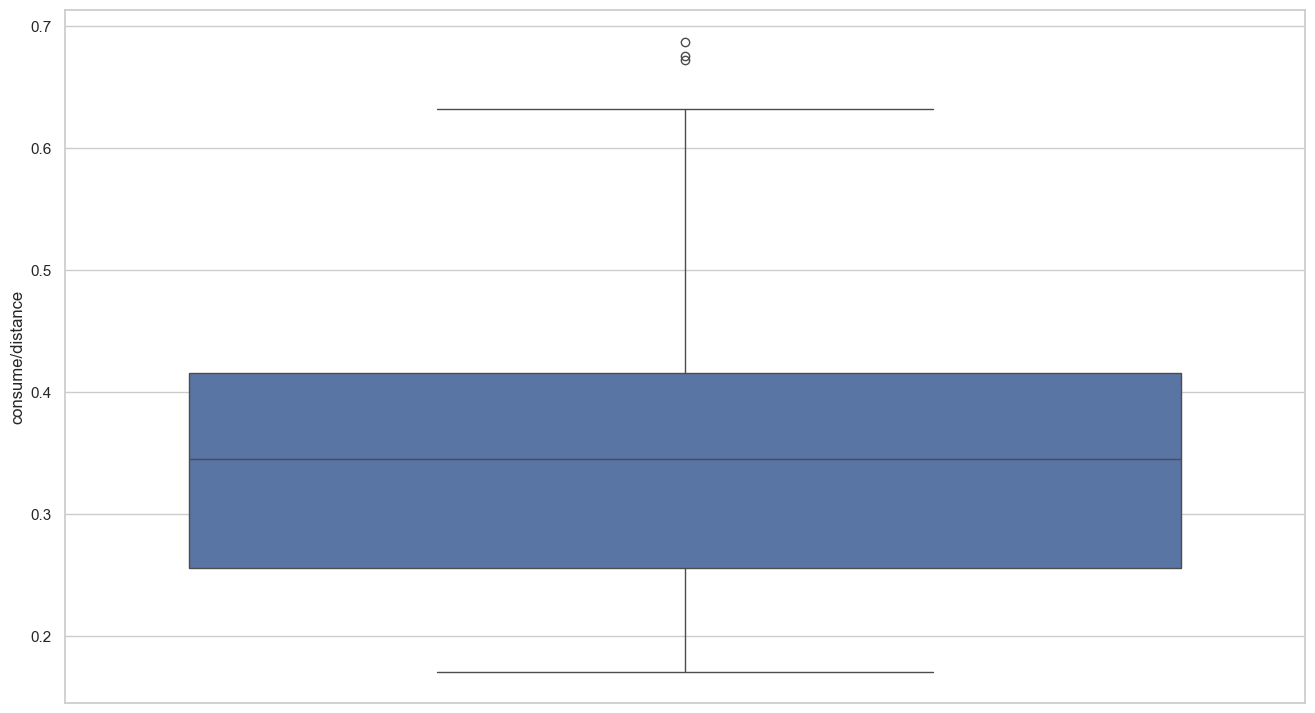

In [170]:
sns.boxplot(df_no_outliers["consume/distance"]);

In [195]:
def remove_outliers(df):
    df = remove_distance_outliers(df)
    df = remove_cons_dist_outliers(df)
    return df

In [196]:
df_no_outliers = remove_outliers(new_df)

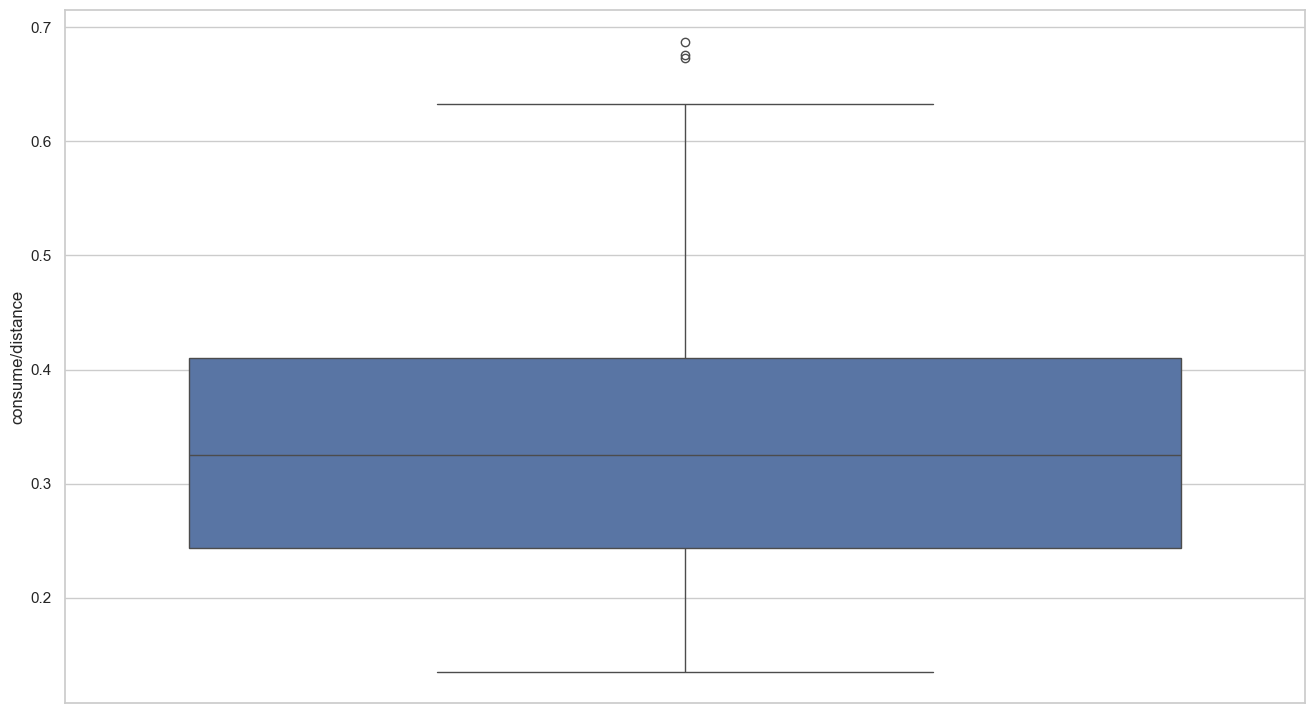

In [200]:
sns.boxplot(df_no_outliers["consume/distance"]);

In [199]:
df_no_outliers.to_csv("../data/cleaned_measuraments_no_outliers.csv", index=False)

## linear regression

In [183]:
new_df_num = new_df[["distance", "consume", "speed", "temp_outside", "AC", "rain", "sun", "gas_type_bin"]]

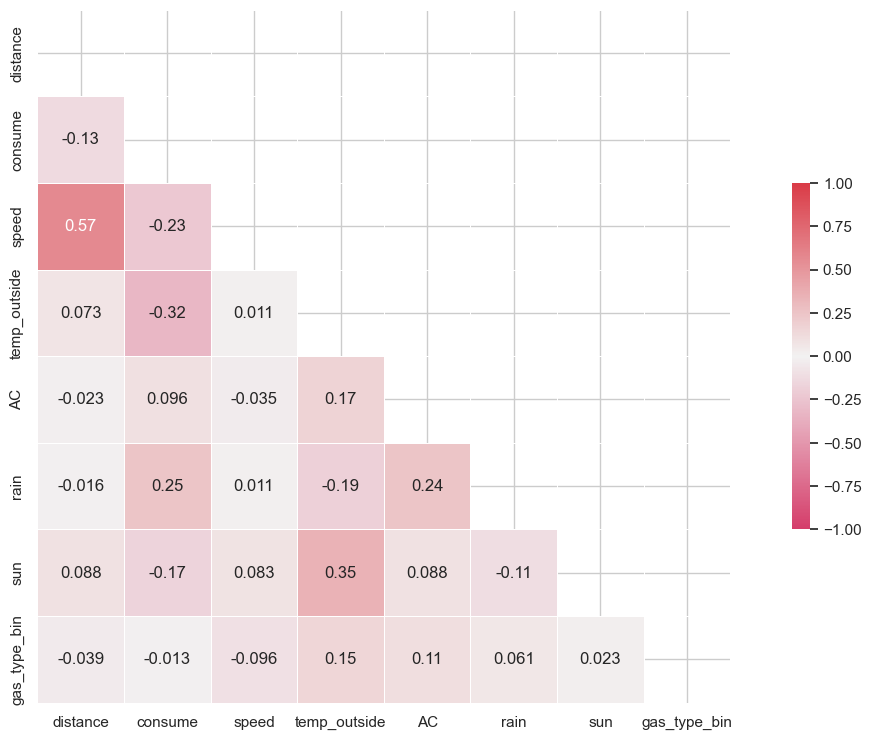

In [187]:
corr = new_df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            mask = mask,
            cmap=color_map,
            annot=True,
            square=True, 
            linewidth=0.5,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            cbar_kws={"shrink": .5} #steps for the scale
);

In [246]:
# 1. X, y: 
X = new_df_num.drop(columns=["consume"])
y = new_df_num["consume"]

# 2. Choose a model: lr
lr = LinearRegression() # Instantiating the model -> draw a straight line

# 3. Fit
lr.fit(X, y) # Draw the straight line based on this data

LinearRegression()

In [211]:
mean_speed = new_df_num["speed"].mean()
stdv_speed = new_df_num["speed"].std()

mean_distance = new_df_num["distance"].mean()
stdv_distance = new_df_num["distance"].std()

mean_temp = new_df_num["temp_outside"].mean()
stdv_temp = new_df_num["temp_outside"].std()

41.88630490956072

In [272]:
sample_size = 500
speed_sample = np.random.normal(mean_speed, stdv_speed, sample_size)
distance_sample = np.random.normal(mean_distance, stdv_distance, sample_size)
temp_sample = np.random.normal(mean_temp, stdv_temp, sample_size)
AC_sample = np.random.randint(2, size=sample_size)
rain_sample = np.random.randint(2, size=sample_size)

In [273]:
data = {'distance': distance_sample, 'speed': speed_sample, 'temp_outside' : temp_sample , 'AC': AC_sample, 'rain': rain_sample}
df1 = pd.DataFrame(data)
df1['sun'] = df1['rain'].apply(lambda x : int(not x))
df2 = df1.copy()

In [274]:
df1["gas_type_bin"] = np.full(sample_size, "1") #SP98
df2["gas_type_bin"] = np.full(sample_size, "0") #E10

In [275]:
Y1 = lr.predict(df1)
Y2 = lr.predict(df2)

In [276]:
Y1.mean()

5.214180932127418

In [277]:
Y2.mean()

5.237999052777047